# (Super-)Dense coding

Previously we have used entangled Bell state to teleport quantum information. To this end Alice needed to send two bits of classical information. A similar task to the teleportation is the *(super-)dense coding.* This task also utilizes an entangled (Bell) state, but instead of sending two bits of information to Bob, Alice sends him one qubit. This qubit alone possess no information (that would be accessible to a potential eavesdropper), but since Alice and Bob shared enatanglement, this qubit is used to send two bits of information to Bob.

In this notebook we will explore how this is done. Let us start with some initializations.

In [1]:
import qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from random import randint
from math import pi

qreg = qiskit.QuantumRegister(2)
creg = qiskit.ClassicalRegister(2)

simulator = qiskit.Aer.get_backend("qasm_simulator")
statevector = qiskit.Aer.get_backend('statevector_simulator')

## Defining the protocol

In the dense coding, Alice and Bob share the $|\Phi^+\rangle$ Bell state. At this point Bob travels to the galaxy far far away and awaits message from Alice. Alice, when the time comes to send two bits, changes her qubit according to the two bits `(a, b)` and send the qubit to Bob. Bob after receiving the state performs the Bell measurement, which shall tell him the two bits Alice was sending to him.

The connection to the teleportation is that Alice's Bell measurement is given to Bob, while Alice prepares a specific Bell state.

The particular steps of the dense-cding protocol are:
1. Alice and Bob share the $|\Phi^+\rangle$ state.
2. Bob travels to the galaxy far far away.
3. Alice chooses the two bits (a, b).
4. Alice applies the X gate if a = 1.
5. Alice applies the Z gate if b = 1.
6. Alice sends the qubit to Bob.
7. Bob performs the Bell measurement.

**Task:** Prepare a circuit that performs the dense coding protocol and check its validity. Your program must contain:
- Bell state $|\Phi^+\rangle$ preparation
- Alice's encoding of the two bits
- Bob's decoding of the two bits using the Bell measurement
- validation of the correctness of the procedure
- evidence that the state sent by Alice does not contain any relevant information

Bell state $|\Phi^+\rangle$ preparation:

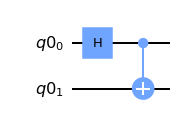

In [13]:
phi_plus = qiskit.QuantumCircuit(qreg)
phi_plus.h(0)
phi_plus.cx(0, 1)

phi_plus.draw(output="mpl")

Bell measurement:

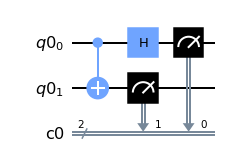

In [14]:
Mbell = qiskit.QuantumCircuit(qreg, creg)
Mbell.cx(0, 1)
Mbell.h(0)
Mbell.measure(qreg, creg)

Mbell.draw(output="mpl")

Let us define function `dense_coding` that prepares the circuit according to the specifications.

In [15]:
def dense_coding(a, b, qreg, creg, measure=True):
    circ = qiskit.QuantumCircuit(qreg, creg)

    # state preparation
    circ = circ.compose(phi_plus)
    
    # Bob leaves the galaxy
    circ.barrier()

    # Alice's encoding procedure
    if a:
        circ.x(0)
    
    if b:
        circ.z(0)
    
    # Alice sends qubit to Bob
    circ.barrier()
    
    if not measure:
        return circ

    # Bob measures in the Bell basis
    circ = circ.compose(Mbell)

    return circ

We can use the dense-coding circuit preparator function to test its validity:

In [16]:
cases = [(0, 0), (0, 1), (1, 0), (1, 1)]

for a, b in cases:
    circ = dense_coding(a, b, qreg, creg)

    job = qiskit.execute(circ, simulator, shots=1024)
    print(f"Alice: a={a}, b={b}\t\tBob measured: {job.result().get_counts()}")


Alice: a=0, b=0		Bob measured: {'00': 1024}
Alice: a=0, b=1		Bob measured: {'01': 1024}
Alice: a=1, b=0		Bob measured: {'10': 1024}
Alice: a=1, b=1		Bob measured: {'11': 1024}


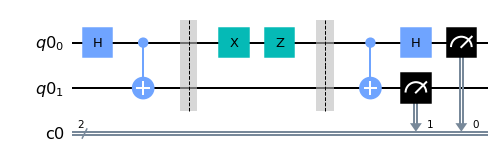

In [6]:
dense_coding(1, 1, qreg, creg).draw(output="mpl")

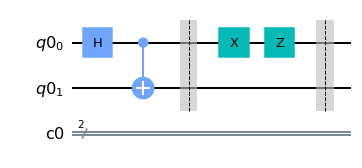

In [7]:
dense_coding(1, 1, qreg, creg, False).draw(output="mpl")

To see that the transmitted qubit (`q0`) bears no information, we can check that its state vector is represented by the identity density matrix, which in the state vector pisture has the length of its (Bloch) vector zero. Similarly, nor does the qubit `q1` provide any information. Since the prepared state in either of the Alice's cases is one of the Bell states, the whole information about which of the Bell states was prepared is stored solely in the correlations (entanglement).

/home/awesome/anaconda3/envs/kvant_test/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


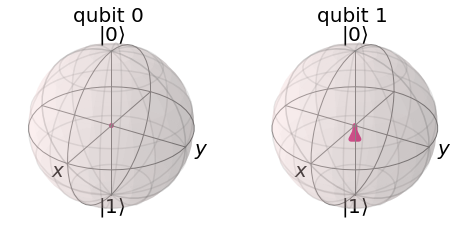

In [8]:
job = qiskit.execute(dense_coding(0, 0, qreg, creg, False), statevector)
plot_bloch_multivector(job.result().get_statevector())

In [9]:
print(job.result().get_statevector())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


/home/awesome/anaconda3/envs/kvant_test/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


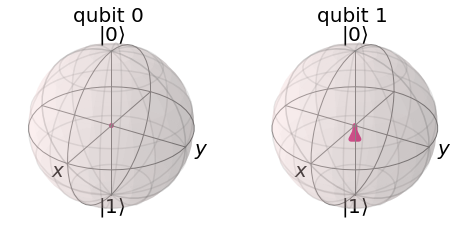

In [10]:
job = qiskit.execute(dense_coding(0, 1, qreg, creg, False), statevector)
plot_bloch_multivector(job.result().get_statevector())

/home/awesome/anaconda3/envs/kvant_test/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


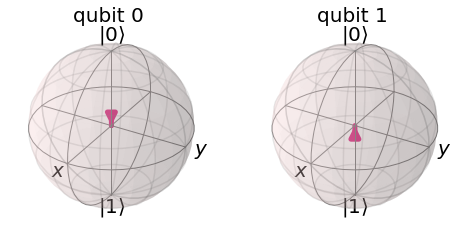

In [11]:
job = qiskit.execute(dense_coding(1, 0, qreg, creg, False), statevector)
plot_bloch_multivector(job.result().get_statevector())

/home/awesome/anaconda3/envs/kvant_test/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


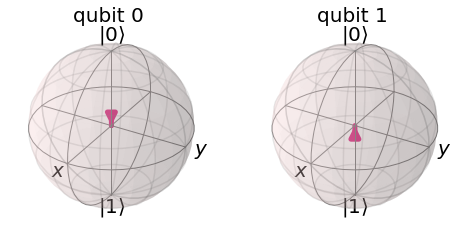

In [12]:
job = qiskit.execute(dense_coding(1, 1, qreg, creg, False), statevector)
plot_bloch_multivector(job.result().get_statevector())